In [30]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%pylab inline

import numpy as np
import sklearn
import pandas as pd
from sklearn.decomposition import PCA
import os

env_var = os.environ
os.environ["LACE_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/LaCE"
os.environ["LACE_MANAGER_REPO"] = "/nfs/pic.es/user/l/lcabayol/DESI/LaCE_manager"

import matplotlib.pyplot as plt
# make pretty plots
font = {'size'   : 12}
matplotlib.rc('font', **font)
plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'cm'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# our modules
from lace.emulator import gp_emulator
from lace.emulator import p1d_archive
from lace.cosmo import camb_cosmo
from lace.cosmo import fit_linP
from lace.emulator import poly_p1d
from lace.emulator import pd_archive

# read eBOSS P1D to plot relative error bars
from lace_manager.data import data_Chabanier2019
chab=data_Chabanier2019.P1D_Chabanier2019()

# Set up cosmology to get eBOSS k_max at each z where we have data
cosmo_fid=camb_cosmo.get_cosmology()

 /data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/lace-1.0.1-py3.10.egg/lace/emulator/pd_archive.py:210: SyntaxWarning:"is" with a literal. Did you mean "=="?
 /data/astro/scratch/lcabayol/anaconda3/envs/DESIenv6/lib/python3.10/site-packages/lace-1.0.1-py3.10.egg/lace/emulator/pd_archive.py:210: SyntaxWarning:"is" with a literal. Did you mean "=="?


In [3]:
def sigma68(data): return 0.5*(np.nanquantile(data,q = 0.84,axis = 0) - np.nanquantile(data,q = 0.16,axis = 0))


## LOAD FRACTIONAL ERRORS

In [4]:
fractional_error_0mFsc = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_tau1.txt').reshape(30,11,32)-1)*100
fractional_error_5mFsc = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_tau3.txt').reshape(30,11,32)-1)*100
fractional_error_10mFsc = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_tau0.txt').reshape(30,11,32)-1)*100



In [5]:
sigma68(fractional_error_0mFsc.flatten()),sigma68(fractional_error_5mFsc.flatten()),sigma68(fractional_error_10mFsc.flatten())



(0.8848775244591665, 0.9063439594622223, 0.9972793360786248)

In [6]:
fractional_error_0mFsc_dropall = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_droprescalings_tau1.txt').reshape(30,11,32)-1)*100
fractional_error_5mFsc_dropall = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_droprescalings_tau3.txt').reshape(30,11,32)-1)*100
fractional_error_10mFsc_dropall = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_droprescalings_tau0.txt').reshape(30,11,32)-1)*100



In [7]:
sigma68(fractional_error_0mFsc_dropall.flatten()),sigma68(fractional_error_5mFsc_dropall.flatten()),sigma68(fractional_error_10mFsc_dropall.flatten())





(2.3726877152135564, 2.4003819026180944, 2.498396634810759)

In [8]:
fractional_error_0mFsc_drop5 = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_drop5prescalings_tau1.txt').reshape(30,11,32)-1)*100
fractional_error_5mFsc_drop5 = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_drop5prescalings_tau3.txt').reshape(30,11,32)-1)*100
fractional_error_10mFsc_drop5 = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_drop5prescalings_tau0.txt').reshape(30,11,32)-1)*100



In [9]:
sigma68(fractional_error_0mFsc_drop5.flatten()),sigma68(fractional_error_5mFsc_drop5.flatten()),sigma68(fractional_error_10mFsc_drop5.flatten())





(1.0267998029028433, 1.0499657528101933, 1.1048188619396926)

In [10]:
fractional_error_0mFsc_drop10 = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_drop10prescalings_tau1.txt').reshape(30,11,32)-1)*100
fractional_error_5mFsc_drop10 = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_drop10prescalings_tau3.txt').reshape(30,11,32)-1)*100
fractional_error_10mFsc_drop10 = (np.loadtxt('fractional_errors/mean_flux_rescalings/fractional_error_avaxesphases_drop10prescalings_tau0.txt').reshape(30,11,32)-1)*100



In [11]:
sigma68(fractional_error_0mFsc_drop10.flatten()),sigma68(fractional_error_5mFsc_drop10.flatten()),sigma68(fractional_error_10mFsc_drop10.flatten())





(1.149331265989583, 1.1811335738005595, 1.2591404009363099)

Text(0.5, 0, '$z$')

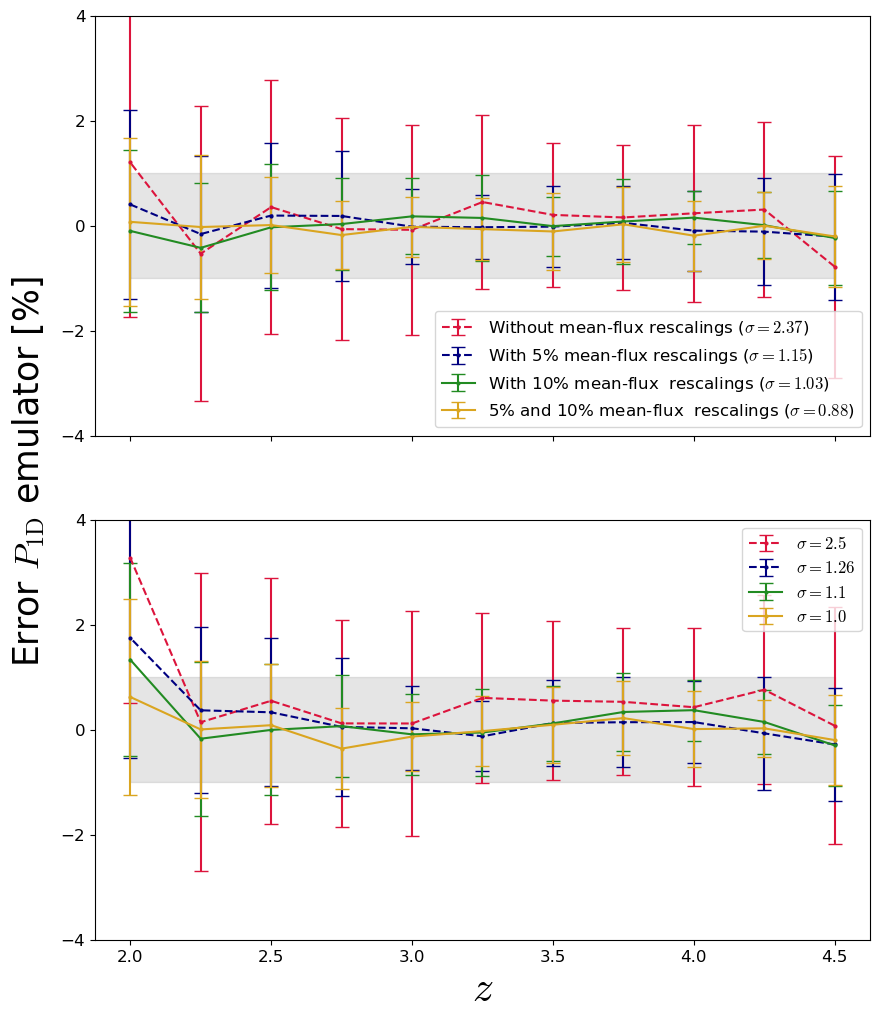

In [12]:
fig, ax = plt.subplots(ncols=1, nrows= 2,figsize = (10,12), sharey=True, sharex=True)
zaxis = np.flip(np.linspace(2.,4.5,11))

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20 )


ax[0].errorbar(zaxis, np.nanmedian(np.nanmedian(fractional_error_0mFsc_dropall,2),0),sigma68(np.nanmedian(fractional_error_0mFsc_dropall,2)),ls = '--', fmt = 'o',capsize=5, markersize=2, color = 'crimson',label = f'Without mean-flux rescalings ($\sigma={np.round(sigma68(fractional_error_0mFsc_dropall.flatten()),2)}$)')
ax[0].errorbar(zaxis, np.nanmedian(np.nanmedian(fractional_error_0mFsc_drop10,2),0),sigma68(np.nanmedian(fractional_error_0mFsc_drop10,2)),ls = '--', fmt = 'o',capsize=5, markersize=2, color = 'navy',label = f'With 5% mean-flux rescalings ($\sigma={np.round(sigma68(fractional_error_0mFsc_drop10.flatten()),2)}$)')
ax[0].errorbar(zaxis, np.nanmedian(np.nanmedian(fractional_error_0mFsc_drop5,2),0), sigma68(np.nanmedian(fractional_error_0mFsc_drop5,2)), ls = '-', fmt = 'o', capsize=5, markersize=2, color = 'forestgreen',label = f'With 10% mean-flux  rescalings ($\sigma={np.round(sigma68(fractional_error_0mFsc_drop5.flatten()),2)}$)')
ax[0].errorbar(zaxis, np.nanmedian(np.nanmedian(fractional_error_0mFsc,2),0), sigma68(np.nanmedian(fractional_error_0mFsc,2)), ls = '-', fmt = 'o', capsize=5, markersize=2, color = 'goldenrod',label = f'5% and 10% mean-flux  rescalings ($\sigma={np.round(sigma68(fractional_error_0mFsc.flatten()),2)}$)')



ax[1].errorbar(zaxis, np.nanmedian(np.nanmedian(fractional_error_10mFsc_dropall,2),0),sigma68(np.nanmedian(fractional_error_10mFsc_dropall,2)),ls = '--', fmt = 'o',capsize=5, markersize=2, color = 'crimson',label = f'$\sigma={np.round(sigma68(fractional_error_10mFsc_dropall.flatten()),2)}$')
ax[1].errorbar(zaxis, np.nanmedian(np.nanmedian(fractional_error_10mFsc_drop10,2),0),sigma68(np.nanmedian(fractional_error_10mFsc_drop10,2)),ls = '--', fmt = 'o',capsize=5, markersize=2, color = 'navy',label = f'$\sigma={np.round(sigma68(fractional_error_10mFsc_drop10.flatten()),2)}$')
ax[1].errorbar(zaxis, np.nanmedian(np.nanmedian(fractional_error_10mFsc_drop5,2),0), sigma68(np.nanmedian(fractional_error_10mFsc_drop5,2)), ls = '-', fmt = 'o', capsize=5, markersize=2, color = 'forestgreen',label = f'$\sigma={np.round(sigma68(fractional_error_10mFsc_drop5.flatten()),2)}$')
ax[1].errorbar(zaxis, np.nanmedian(np.nanmedian(fractional_error_10mFsc,2),0), sigma68(np.nanmedian(fractional_error_10mFsc,2)), ls = '-', fmt = 'o', capsize=5, markersize=2, color = 'goldenrod',label = f'$\sigma={np.round(sigma68(fractional_error_10mFsc.flatten()),2)}$')




ax[0].legend()
ax[0].set_ylim(-4,4)

ax[1].legend(loc =1)


ax[0].fill_between(zaxis,-1,1, color='grey', alpha=0.2)
ax[1].fill_between(zaxis,-1,1, color='grey', alpha=0.2)


fig.text(0.04, 0.5, r'Error $P_{\rm 1D}$ emulator [%]', va='center', rotation='vertical', fontsize = 25)
#ax[1].set_ylabel('Percent error', fontsize =14)

ax[1].set_xlabel(r'$z$', fontsize =30)


#plt.savefig('mean_flux_rescalings.pdf', bbox_inches = 'tight')

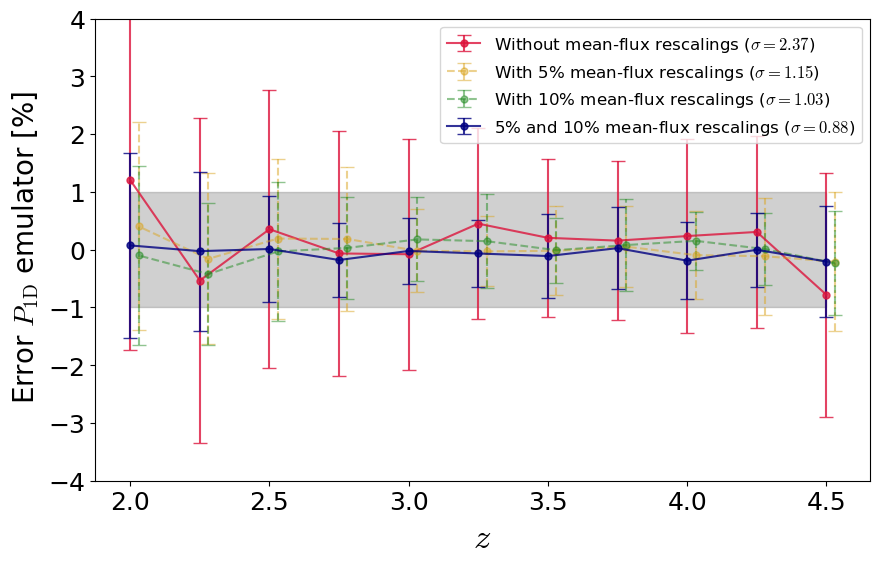

In [31]:
fig, ax = plt.subplots(ncols=1, nrows= 1,figsize = (10,6), sharey=True, sharex=True)
zaxis = np.flip(np.linspace(2.,4.5,11))

matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18 )


ax.errorbar(zaxis, np.nanmedian(np.nanmedian(fractional_error_0mFsc_dropall,2),0), sigma68(np.nanmedian(fractional_error_0mFsc_dropall,2)), ls='-', fmt='o', capsize=5, markersize=5, color='crimson', label=f'Without mean-flux rescalings ($\sigma={np.round(sigma68(fractional_error_0mFsc_dropall.flatten()),2)}$)', alpha=0.8)
line1 = ax.errorbar(zaxis+0.03, np.nanmedian(np.nanmedian(fractional_error_0mFsc_drop10,2),0), sigma68(np.nanmedian(fractional_error_0mFsc_drop10,2)), ls='--', fmt='o', capsize=5, markersize=5, color='goldenrod', label=f'With 5% mean-flux rescalings ($\sigma={np.round(sigma68(fractional_error_0mFsc_drop10.flatten()),2)}$)', alpha=0.5)
line2 = ax.errorbar(zaxis+0.03, np.nanmedian(np.nanmedian(fractional_error_0mFsc_drop5,2),0), sigma68(np.nanmedian(fractional_error_0mFsc_drop5,2)), ls='--', fmt='o', capsize=5, markersize=5, color='forestgreen', label=f'With 10% mean-flux rescalings ($\sigma={np.round(sigma68(fractional_error_0mFsc_drop5.flatten()),2)}$)', alpha=0.5)
ax.errorbar(zaxis, np.nanmedian(np.nanmedian(fractional_error_0mFsc,2),0), sigma68(np.nanmedian(fractional_error_0mFsc,2)), ls='-', fmt='o', capsize=5, markersize=5, color='navy', label=f'5% and 10% mean-flux rescalings ($\sigma={np.round(sigma68(fractional_error_0mFsc.flatten()),2)}$)', alpha=0.8)


line1[-1][0].set_linestyle('--')
line2[-1][0].set_linestyle('--')

ax.legend()
ax.set_ylim(-4,4)

ax.legend(loc =1)


ax.fill_between(zaxis,-1,1, color='grey', alpha=0.2)
ax.fill_between(zaxis,-1,1, color='grey', alpha=0.2)


fig.text(0.04, 0.5, r'Error $P_{\rm 1D}$ emulator [%]', va='center', rotation='vertical', fontsize = 20)
#ax[1].set_ylabel('Percent error', fontsize =14)

ax.set_xlabel(r'$z$', fontsize =25)


plt.savefig('mean_flux_rescalings.pdf', bbox_inches = 'tight')